In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

housing_data = pd.read_csv("Housing.csv")

housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [67]:
housing_data.shape

(545, 13)

In [68]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [70]:
housing_data.isnull().values.any()

np.False_

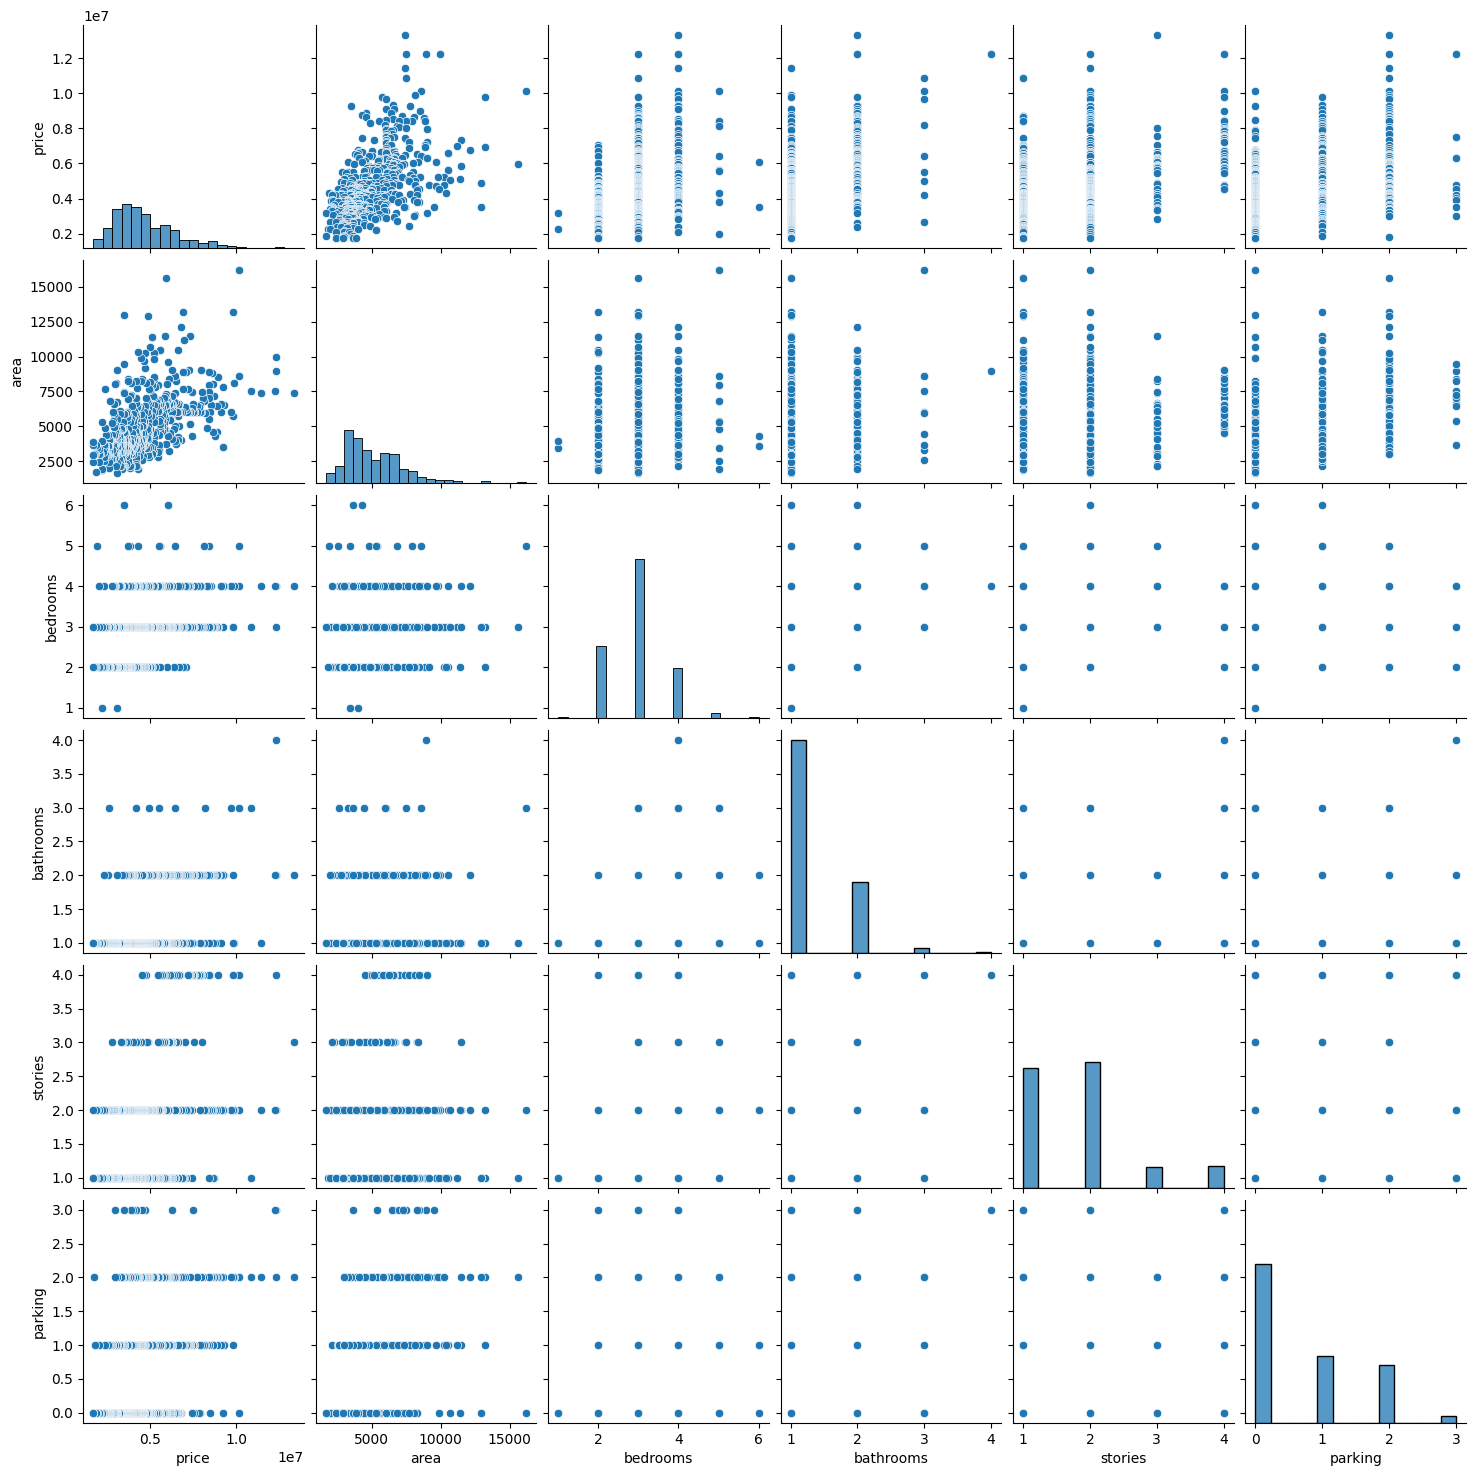

In [71]:
sns.pairplot(housing_data)

In [72]:
housing_data.corr(method='pearson', numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [73]:
housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [96]:
lst =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing_data[lst] = housing_data[lst].apply(binary_map)

housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [97]:
furnStat = pd.get_dummies(housing_data['furnishingstatus'], drop_first=True)

furnStat

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [99]:
housing_data = pd.concat([housing_data, furnStat], axis=1)

In [101]:
housing_data.drop(['furnishingstatus'], axis=1, inplace=True)

In [107]:
housing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

housing_data_train, housing_data_test = train_test_split(housing_data, train_size=0.7, test_size=0.3, random_state=1)

housing_data_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
180,5215000,4500,4,2,1,0,0,1,0,1,2,0,True,False
189,5040000,3540,2,1,1,0,1,1,0,0,0,0,True,False
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,True,False
444,3220000,3120,3,1,2,0,0,0,0,0,0,0,False,False
81,6615000,4000,3,2,2,1,0,1,0,1,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,True,False
144,5600000,4700,4,1,2,1,1,1,0,1,1,0,False,False
72,6720000,5020,3,1,4,1,0,0,0,1,0,1,False,True
235,4620000,5680,3,1,2,1,1,0,0,1,1,0,True,False


In [159]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

values = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing_data_train[values] = sc.fit_transform(housing_data_train[values])


X_train = housing_data_train.drop('price', axis=1)
Y_train = housing_data_train['price']


housing_data_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
180,0.244221,-0.326835,1.323414,1.398729,-0.928204,0,0,1,0,1,1.520466,0,True,False
189,0.147043,-0.754726,-1.302736,-0.582370,-0.928204,0,1,1,0,0,-0.796724,0,True,False
93,0.846724,0.876611,0.010339,1.398729,-0.928204,1,0,1,0,1,2.679062,0,True,False
444,-0.863607,-0.941929,0.010339,-0.582370,0.254558,0,0,0,0,0,-0.796724,0,False,False
81,1.021644,-0.549695,0.010339,1.398729,0.254558,1,0,1,0,1,0.361871,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.609610,2.775380,0.010339,-0.582370,1.437320,1,0,0,0,0,1.520466,1,True,False
144,0.458012,-0.237691,1.323414,-0.582370,0.254558,1,1,1,0,1,0.361871,0,False,False
72,1.079951,-0.095060,0.010339,-0.582370,2.620082,1,0,0,0,1,-0.796724,1,False,True
235,-0.086184,0.199115,0.010339,-0.582370,0.254558,1,1,0,0,1,0.361871,0,True,False


<Axes: >

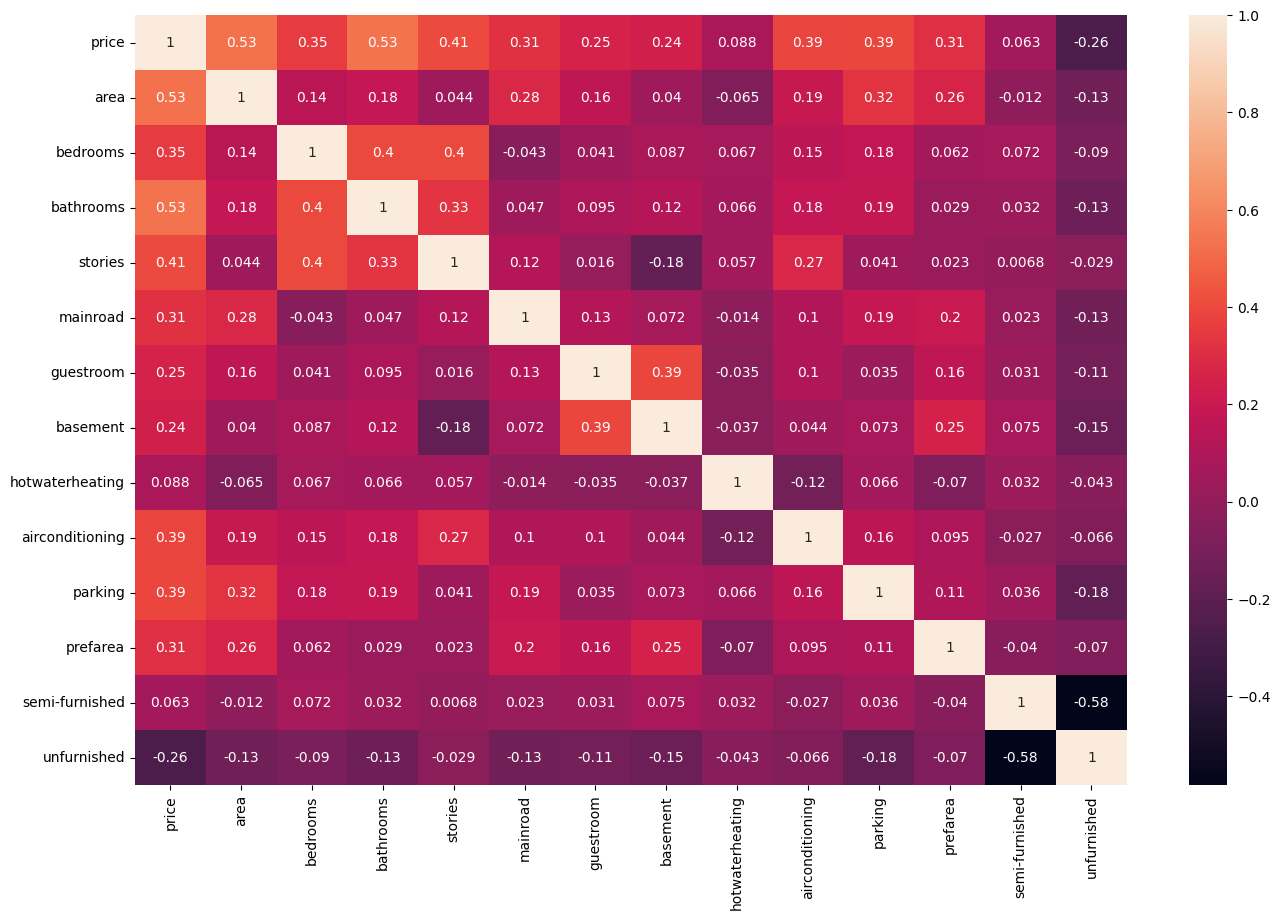

In [160]:
plt.figure(figsize=(16, 10))
sns.heatmap(housing_data_train.corr(), annot=True)

In [161]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

housing_data_test[num_vars] = sc.fit_transform(housing_data_test[num_vars])


X_test = housing_data_test.drop('price', axis=1)
Y_test = housing_data_test['price']

In [162]:
housing_model = LinearRegression()

housing_model.fit(X_train, Y_train)

Y_pred = housing_model.predict(X_test)

Y_pred

array([ 8.82169986e-01,  5.58144729e-01,  8.00046453e-01,  5.05455410e-01,
       -5.55816239e-01, -1.31508591e+00, -1.50996473e+00,  1.89008636e+00,
       -1.67985449e+00, -9.73817951e-02, -9.01301572e-01, -1.00894409e+00,
       -4.07619051e-02, -9.37585421e-02,  4.46987398e-02,  2.19006518e+00,
       -1.91769459e-01, -9.39858664e-01,  1.19351329e+00, -1.49015265e+00,
       -4.65684566e-01,  1.04902109e-03, -1.57827115e-01, -1.05002589e+00,
        2.80544080e-02,  1.71378008e+00, -1.43858487e+00,  1.58175947e+00,
        1.96170469e+00, -2.47083217e-01,  1.97161131e+00,  7.39756013e-01,
        1.14132317e-01, -4.00998571e-01,  8.23772273e-01, -2.35448678e-03,
        9.79019136e-01, -7.77058679e-01,  2.04503592e-01,  6.03519301e-01,
       -7.87955401e-01, -1.15420050e+00, -9.66784024e-01, -8.79250362e-02,
        8.71586745e-01, -1.07644152e+00, -2.00749351e-01, -1.47941801e+00,
       -1.22014073e+00, -1.17083692e+00, -2.08635177e-01, -1.94487066e-01,
       -1.51344800e+00, -

In [163]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

r2_score(Y_test, Y_pred)

0.6296175553875237

In [164]:
mean_squared_error(Y_test, Y_pred)

np.float64(0.37038244461247627)

In [165]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

np.float64(0.608590539371486)

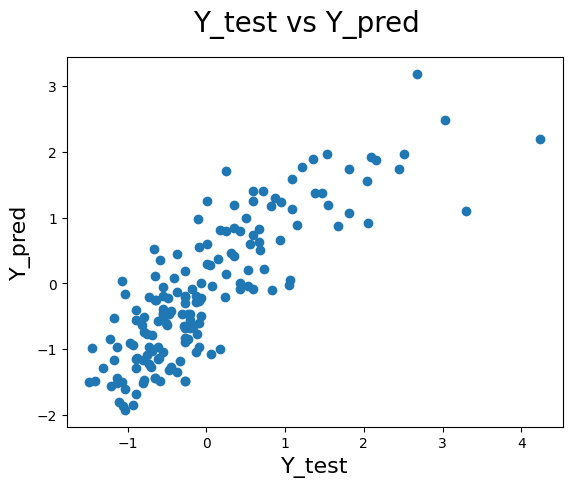

In [166]:
fig = plt.figure()

plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize=20)
plt.xlabel('Y_test', fontsize=16)
plt.ylabel('Y_pred', fontsize=16)
plt.show()